In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
orig_data = pd.read_excel("Copy of ecology.xlsx")
orig_data.head(1)

,id,a4a,a6a,a2,a0,b1,b5,b7a,d1a1x,g1a,...,BMGc23i,BMGc23j,BMGc24,BMGc25,BMGc27,BMGd6,BMGd7,BMGe1,BMGe2,BMGe2u
0,22,Готовые Металлические Изделия,Малый,Центральный Федеральный округ,Производство,Акционерная компания с неторгуемыми акциями ил...,2007,0,Производство Готовых Строительных Металлически...,0,...,1,0,Модернизация машин и оборудования,1,NaN,0,0,100000,20000,Литры


In [ ]:
orig_data['BMGc23h'].value_counts()

BMGc23h
0    995
1    328
Name: count, dtype: int64

In [ ]:
cols = [
    'BMGc23a',
    'BMGc23c',
    'BMGc23b',
    'BMGc23d',
    'BMGc23e',
    'BMGc23f',
    'BMGc23g',
    'BMGc23h',
    'BMGc23j'
        ]

In [ ]:
def get_one_or_zero(x: str) -> int:
    x = str(x).lower()
    if x in ['не знаю', 'не применимо', 'нет', '0']:
        return 0
    if x in ['да', "1"]:
        return 1
    return None

In [ ]:
orig_data['BMGc23a'] = orig_data['BMGc23a'].apply(lambda x: get_one_or_zero(x))
orig_data['BMGc23c'] = orig_data['BMGc23c'].apply(lambda x: get_one_or_zero(x))
orig_data['BMGc23h'] = orig_data['BMGc23h'].apply(lambda x: get_one_or_zero(x))

In [ ]:
orig_data.info()

In [ ]:
def get_index(data):
    index = 0
    try:
        for col in cols:
            index += data[col].values[0]
    except Exception:
        return None
    return index

In [ ]:
orig_data['ecology_index'] = orig_data['id'].apply(lambda x: get_index(orig_data[orig_data['id'] == x]))
orig_data

,id,a4a,a6a,a2,a0,b1,b5,b7a,d1a1x,g1a,...,BMGc23j,BMGc24,BMGc25,BMGc27,BMGd6,BMGd7,BMGe1,BMGe2,BMGe2u,ecology_index
0,22,Готовые Металлические Изделия,Малый,Центральный Федеральный округ,Производство,Акционерная компания с неторгуемыми акциями ил...,2007,0,Производство Готовых Строительных Металлически...,0,...,0,Модернизация машин и оборудования,1,NaN,0,0,100000,20000,Литры,4
1,29,Машины и оборудование,Крупный,Центральный Федеральный округ,Производство,Акционерная компания с неторгуемыми акциями ил...,2002,0,Производство Насосов И Компрессоров,0,...,0,Модернизация машин и оборудования,0,Не является приоритетом по сравнению с другими...,0,0,160000,18500,Литры,3
2,34,Другое Производство,Средний,Центральный Федеральный округ,Производство,Акционерная компания с неторгуемыми акциями ил...,2005,0,"Производство Алюминиевых И Медных Проводов, Си...",100,...,0,NaN,0,Нехватка финансовых ресурсов,0,0,Не знаю,Не знаю,NaN,0
3,50,Готовые Металлические Изделия,Малый,Центральный Федеральный округ,Другие услуги,Акционерная компания с неторгуемыми акциями ил...,2015,0,Строительство жилых и нежилых зданий,0,...,0,NaN,0,Операционный и/ или технический риск,0,0,Не знаю,Не знаю,NaN,0
4,56,Другие Услуги,Малый,Центральный Федеральный округ,Другие услуги,Акционерная компания с неторгуемыми акциями ил...,2002,0,Оптовая Продажа Офисной Мебели,0,...,0,Модернизация машин и оборудования,0,Нехватка финансовых ресурсов,0,0,100000,10000,Литры,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,699748,Розничная торговля,Крупный,Приволжский федеральный округ,Розничная торговля,Акционерная компания с неторгуемыми акциями ил...,2008,0,"Сеть Супермаркетов, Торгующих продуктами питан...",30,...,0,Модернизация машин и оборудования,1,NaN,1,0,Не знаю,Не знаю,NaN,3
1319,699752,Розничная торговля,Крупный,Центральный Федеральный округ,Розничная торговля,Акционерная компания с неторгуемыми акциями ил...,2001,0,Розничная Торговля продуктами питания,100,...,0,Управление водными ресурсами,0,Не является приоритетом по сравнению с другими...,0,0,500000,90000,Литры,3
1320,699770,Розничная торговля,Крупный,Дальневосточный федеральный округ,Розничная торговля,Акционерная компания с неторгуемыми акциями ил...,2005,0,Розничная Продажа Бытовых Электроприборов,Не применимо,...,0,NaN,0,Не выгодно,0,0,Не знаю,0,NaN,1
1321,699775,Розничная торговля,Крупный,Сибирский федеральный округ,Другие услуги,Акционерная компания с неторгуемыми акциями ил...,2002,0,Розничная Продажа Моторного топлива В Специали...,Не применимо,...,0,Не знаю,1,NaN,0,0,Не знаю,Не знаю,NaN,4


In [ ]:
orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   1323 non-null   int64 
 1   a4a                  1323 non-null   object
 2   a6a                  1323 non-null   object
 3   a2                   1323 non-null   object
 4   a0                   1323 non-null   object
 5   b1                   1323 non-null   object
 6   b5                   1323 non-null   object
 7   b7a                  1323 non-null   object
 8   d1a1x                1323 non-null   object
 9   g1a                  1323 non-null   object
 10  BMj4c                1323 non-null   object
 11  j30_environment_pos  1323 non-null   int64 
 12  BMj5                 1323 non-null   int64 
 13  n2a                  1323 non-null   object
 14  n2e                  889 non-null    object
 15  n2b                  1323 non-null   object
 16  n2f   

<Axes: xlabel='ecology_index', ylabel='Count'>

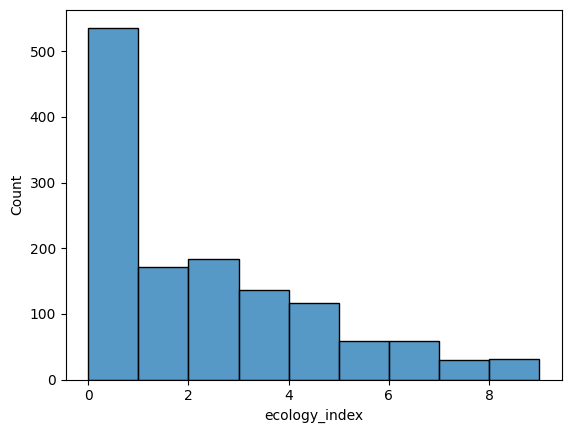

In [ ]:
sns.histplot(data=orig_data, x='ecology_index', bins=9)

In [ ]:
orig_data.to_excel('added_index.xlsx')